In [22]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

In [2]:
from keras.datasets import fashion_mnist

In [33]:
((trainX,trainY),(testX,testY)) = fashion_mnist.load_data()
((trainX,trainY),(testX,test2Y)) = fashion_mnist.load_data()

In [4]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def drawing(img,label):
    plt.title(label)
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    plt.show()

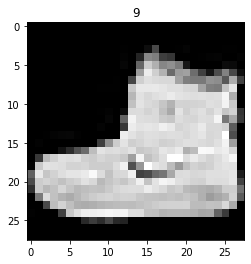

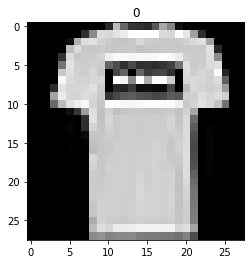

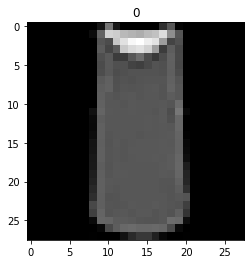

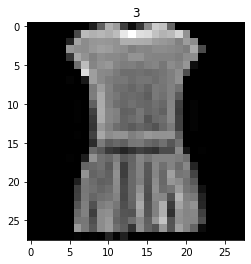

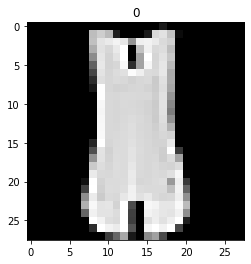

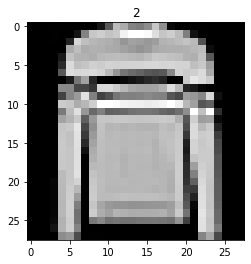

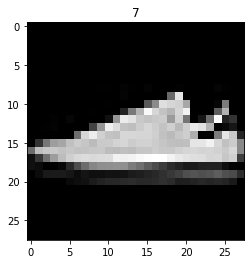

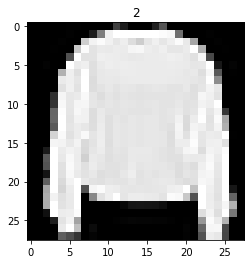

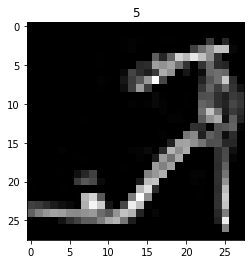

In [7]:
for i in range(9):
    drawing(trainX[i],trainY[i])

In [11]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [12]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')
trainX = trainX / 255.0
testX = testX / 255.0

In [14]:
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.2)

In [27]:
# Define the model structure
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
__________

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [30]:
history = model.fit(trainX,trainY, epochs=15, validation_data=(testX, testY))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 46s 762us/step - loss: 0.5861 - acc: 0.7823 - val_loss: 0.4250 - val_acc: 0.8477
Epoch 2/15
60000/60000 [==============================] - 44s 726us/step - loss: 0.3738 - acc: 0.8633 - val_loss: 0.3929 - val_acc: 0.8612
Epoch 3/15
60000/60000 [==============================] - 45s 742us/step - loss: 0.3212 - acc: 0.8801 - val_loss: 0.3356 - val_acc: 0.8826
Epoch 4/15
60000/60000 [==============================] - 44s 733us/step - loss: 0.2811 - acc: 0.8951 - val_loss: 0.3251 - val_acc: 0.8833
Epoch 5/15
60000/60000 [==============================] - 44s 740us/step - loss: 0.2571 - acc: 0.9043 - val_loss: 0.3273 - val_acc: 0.8796
Epoch 6/15
60000/60000 [==============================] - 42s 706us/step - loss: 0.2333 - acc: 0.9127 - val_loss: 0.3354 - val_acc: 0.8845
Epoch 7/15
60000/6000

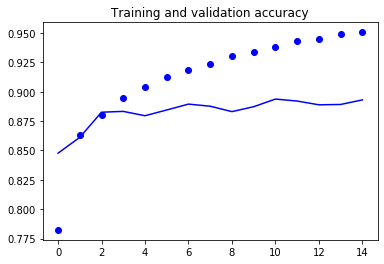

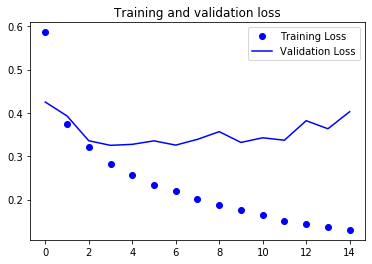

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [37]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [39]:
history2 = model2.fit(X_train,y_train,epochs=5, validation_data=(X_test, y_test),batch_size=32)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 14s 286us/step - loss: 0.0318 - acc: 0.9893 - val_loss: 0.4004 - val_acc: 0.9120
Epoch 2/5
48000/48000 [==============================] - 14s 293us/step - loss: 0.0291 - acc: 0.9906 - val_loss: 0.4054 - val_acc: 0.9127
Epoch 3/5
48000/48000 [==============================] - 15s 318us/step - loss: 0.0216 - acc: 0.9931 - val_loss: 0.4469 - val_acc: 0.9077
Epoch 4/5
48000/48000 [==============================] - 14s 291us/step - loss: 0.0174 - acc: 0.9948 - val_loss: 0.4305 - val_acc: 0.9122
Epoch 5/5
48000/48000 [==============================] - 14s 288us/step - loss: 0.0139 - acc: 0.9961 - val_loss: 0.4553 - val_acc: 0.9096


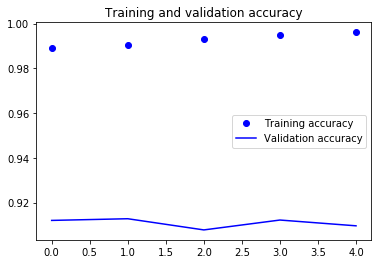

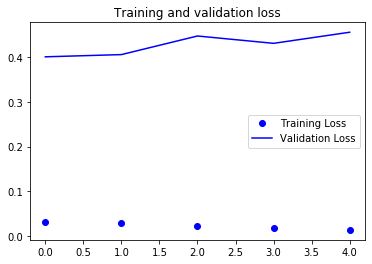

In [41]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
test_loss2, test_acc2 = model2.evaluate(testX,  testY, verbose=2)
test_loss1, test_acc1 = model.evaluate(testX,  testY, verbose=2)
print('\nTest accuracy for model 1:', test_acc1)
print('\nTest accuracy for model 2:', test_acc2)


Test accuracy for model 1: 0.8931

Test accuracy for model 2: 0.9083


# 1. Model - i) 1-Conv Layer

In [15]:
input_shape = (28,28,1)

In [16]:
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
cnn1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
cnn1.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [18]:
history1 = cnn1.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 14s 283us/step - loss: 0.5564 - acc: 0.8036 - val_loss: 0.3725 - val_acc: 0.8732
Epoch 2/10
48000/48000 [==============================] - 13s 270us/step - loss: 0.3585 - acc: 0.8748 - val_loss: 0.3368 - val_acc: 0.8807
Epoch 3/10
48000/48000 [==============================] - 14s 290us/step - loss: 0.3161 - acc: 0.8885 - val_loss: 0.2992 - val_acc: 0.8949
Epoch 4/10
48000/48000 [==============================] - 13s 261us/step - loss: 0.2920 - acc: 0.8953 - val_loss: 0.2838 - val_acc: 0.8975
Epoch 5/10
48000/48000 [==============================] - 13s 277us/step - loss: 0.2662 - acc: 0.9054 - val_loss: 0.2743 - val_acc: 0.9017
Epoch 6/10
48000/48000 [==============================] - 13s 272us/step - loss: 0.2503 - acc: 0.9098 - val_loss: 0.2658 - val_acc: 0.9031
Epoch 7/10
48000/48000

In [19]:
score1 = cnn1.evaluate(testX, testY, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.2601737885713577
Test accuracy: 0.9052


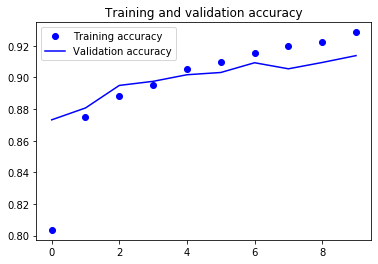

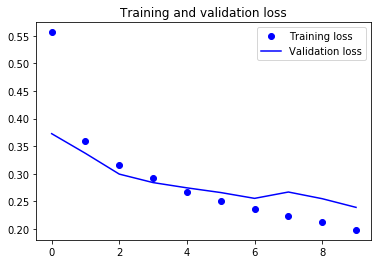

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['acc']
val_accuracy = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# 2-Model 

In [23]:
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn2.add(BatchNormalization())

cnn2.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Dropout(0.25))

cnn2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn2.add(BatchNormalization())
cnn2.add(Dropout(0.25))

cnn2.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn2.add(BatchNormalization())
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Dropout(0.25))

cnn2.add(Flatten())

cnn2.add(Dense(512, activation='relu'))
cnn2.add(BatchNormalization())
cnn2.add(Dropout(0.5))

cnn2.add(Dense(128, activation='relu'))
cnn2.add(BatchNormalization())
cnn2.add(Dropout(0.5))

cnn2.add(Dense(10, activation='softmax'))

In [24]:
cnn2.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
cnn2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        18496     
__________

In [28]:
history2 = cnn2.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 95s 2ms/step - loss: 0.7422 - acc: 0.7440 - val_loss: 0.4446 - val_acc: 0.8319
Epoch 2/10
48000/48000 [==============================] - 94s 2ms/step - loss: 0.4387 - acc: 0.8438 - val_loss: 0.3471 - val_acc: 0.8737
Epoch 3/10
48000/48000 [==============================] - 95s 2ms/step - loss: 0.3636 - acc: 0.8699 - val_loss: 0.2888 - val_acc: 0.8958
Epoch 4/10
48000/48000 [==============================] - 97s 2ms/step - loss: 0.3271 - acc: 0.8832 - val_loss: 0.2906 - val_acc: 0.8936
Epoch 5/10
48000/48000 [==============================] - 98s 2ms/step - loss: 0.3041 - acc: 0.8898 - val_loss: 0.3094 - val_acc: 0.8863
Epoch 6/10
48000/48000 [==============================] - 95s 2ms/step - loss: 0.2847 - acc: 0.8978 - val_loss: 0.2609 - val_acc: 0.9030
Epoch 7/10
48000/48000 [==============================] - 96s 2ms/step - loss: 0.2683 - acc: 0.9036 - val_loss: 0.2288 - val_acc

In [29]:
score2 = cnn2.evaluate(testX, testY, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.24330376490354538
Test accuracy: 0.9126


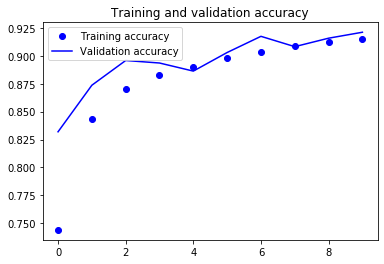

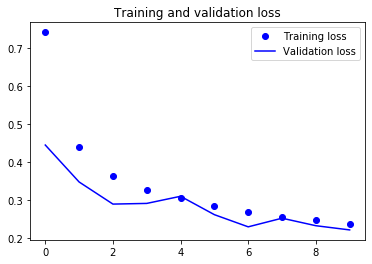

In [30]:
accuracy = history2.history['acc']
val_accuracy = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [48]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [42]:
img = testX[0]
img2 = img.reshape((1,28,28,1))

In [43]:
print(img2.shape)

(1, 28, 28, 1)


In [44]:
cnn2.predict_classes(img2)

array([9], dtype=int64)

In [73]:
def drawing(img,label):
    plt.title(label)
    plt.imshow(img,cmap=plt.get_cmap('gray'))
    plt.savefig('label.jpg')
    plt.show()

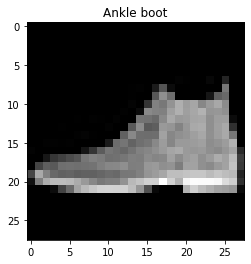

In [72]:
drawing(img,class_names[cnn2.predict_classes(img2)[0]])

In [53]:
imgg = testX[1]
imgg2 = imgg.reshape((1,28,28,1))
predic = cnn2.predict_classes(imgg2)

In [54]:
predic

array([2], dtype=int64)

In [55]:
predic[0]

2

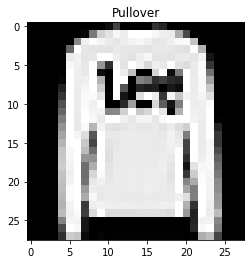

In [74]:
drawing(imgg,class_names[cnn2.predict_classes(imgg2)[0]])

In [59]:
testX = testX.reshape((testX.shape[0],28,28,1))

In [60]:
predicted_classes = cnn2.predict_classes(testX)

In [61]:
predicted_classes

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [62]:
testY

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [63]:
correct = np.nonzero(predicted_classes==testY)[0]
incorrect = np.nonzero(predicted_classes!=testY)[0]

In [64]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(testY, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.61      0.72      1000
     Class 1       0.58      1.00      0.74      1000
     Class 2       0.93      0.27      0.42      1000
     Class 3       0.94      0.48      0.64      1000
     Class 4       0.49      0.88      0.63      1000
     Class 5       0.52      0.99      0.68      1000
     Class 6       0.54      0.18      0.27      1000
     Class 7       1.00      0.28      0.43      1000
     Class 8       0.85      0.95      0.89      1000
     Class 9       0.74      0.98      0.84      1000

    accuracy                           0.66     10000
   macro avg       0.74      0.66      0.63     10000
weighted avg       0.74      0.66      0.63     10000



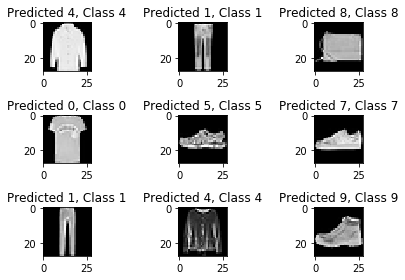

In [65]:
for i, correct in enumerate(correct[10:19]):
    plt.subplot(3,3,i+1)
    plt.imshow(testX[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], testY[correct]))
    plt.tight_layout()

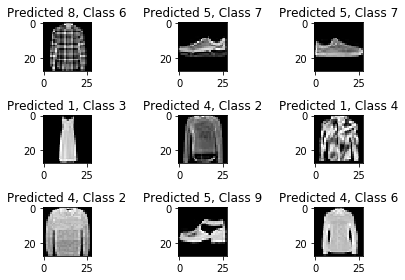

In [66]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(testX[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], testY[incorrect]))
    plt.tight_layout()

In [ ]:

# from keras.preprocessing.image import ImageDataGenerator
# gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
#                                height_shift_range=0.08, zoom_range=0.08)
# batches = gen.flow(X_train, y_train, batch_size=256)
# val_batches = gen.flow(X_val, y_val, batch_size=256)
# history1 = cnn1.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
#                     validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)